<h1 style="color: rgb(0, 91, 94);">The Monty Hall Problem</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


In this notebook, you will analyse the Monty Hall Problem. Once you get to the end you should be able to:

1. Explain the Monty Hall Problem.
2. Simulate the game using code.
3. Run a simulation experiment to infer properties of the problem.
4. Visualise the results.

<h2 style="color: rgb(0, 91, 94);">The Problem</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


The <a href="https://en.wikipedia.org/wiki/Monty_Hall_problem" style="color: #ff791e">Monty Hall problem</a> was a source of great controversy in the 1990's.

The problem is based on an American TV show called Let's Make a Deal, hosted by Monty Hall.

The details of the show are simplified in the problem.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Monty_hall_abc_tv.JPG/184px-Monty_hall_abc_tv.JPG" style="border: 1px solid #ff791e; text-align: left; margin: 10px;" width="200px">


In the simplified version there are three closed doors.

One has a car behind it, and the other two have goats.

The constestant is asked to pick a door and they will win whatever is behind it.

It is assumed the contestant would prefer the car to either of the goats.

<h2 style="color: rgb(0, 91, 94);">The Controversy</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The source of the controversy is the plot twist just before the contestant's door is opened.

One of the other two doors is opened to reveal a goat.

The contestant is then given the chance to switch to the third door or remain with their original door.

<img src="https://github.com/ianmcloughlin/images/raw/master/mvs.jpeg" style="border: 1px solid #ff791e" width="200px">

The controversy surrounds <a href="https://en.wikipedia.org/wiki/Monty_Hall_problem" style="color: #ff791e">Marilyn vos Savant's</a> claim that the contestant should always switch.

She claimed, in an article in the 1990's, that the probability of winning after switching is two thirds but only one third without switching.

Most people think the chances are rather fifty-fifty.

<br>

In this notebook, we are going to simulate the game to see who is right.

<h2 style="color: rgb(0, 91, 94);">Assumptions</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The main assumption we are going to make is that the game is fair.

Before the game starts, one of the three doors is selected at random and the car is placed behind it.

Goats are placed behind the other two doors.

The producers do not move the car at any point after this, irrespective of what happens.

By placing the car *at random* we mean that they give a one third chance of the car ending up behind any given door.

Maybe they use a computer to select the door or have some other fair way.

<br>

Once they do select the door, the producers themselves will obviously know where it is.

They have to put the car there, and later in the game they have to select another door to open to reveal a goat.

Note that when they do open one of the two doors that the contestant has not picked, there is always a goat behind at least one of the two doors.

There might be a goat behind both - that is when the contestant's original door has the car behind it.

<br>

<img src="https://raw.githubusercontent.com/ianmcloughlin/images/master/goat.jpg" style="border: 1px solid #ff791e" width="300px">


Finally, we will also assume that the goats are well behaved and do not make any noise behind the doors.

Anyone who knows anything about goats will realise that this is the least credible assumption.

In all seriousness though, we will assume that the contestant gets no extra information about where the car might be.

They really are picking at random.

<h2 style="color: rgb(0, 91, 94);">Random Door</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The first step in simulating the game will be to write code to select one of the three doors at random.

For this, we will use Python's `random` module from the standard library.

See <a href="https://realpython.com/python-random/" style="color: #ff791e">Real Python's Generating Random Data in Python</a> for more information.

In [1]:
# Python provides a library called random to generate pseudo-random numbers and do stuff with them.
import random

# The three doors in a list.
doors = ['A', 'B', 'C']

# Pick a random door.
print(random.choice(doors))

A


<h2 style="color: rgb(0, 91, 94);">Checking the Randomness</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The pick is meant to give a one third probability to each door.

Let us run the code 10,000 times and plot the results.

If each door is picked with a probability of one third, we should get approximately 3,333 of each door selected.

We will allow for some variation - after it is random.

In [2]:
# The number time we will select a door at random.
no_doors = 10000

# Run the selection.
selections = [random.choice(doors) for i in range(no_doors)]

# Count the number of times door A is selected.
A = selections.count('A')
# Count the number of times door B is selected.
B = selections.count('B')
# Count the number of times door C is selected.
C = selections.count('C')

# Let us have a look at the first ten doors selected, just for curiousity.
print("First ten items: ", selections[:10])

# Now let us print the number of times each door was selected.
print(f"Out of the {no_doors} selection: {A} were door A, {B} were door B, and {C} were door C.")

First ten items:  ['B', 'A', 'A', 'A', 'C', 'C', 'A', 'B', 'B', 'A']
Out of the 10000 selection: 3309 were door A, 3410 were door B, and 3281 were door C.


Let's use a bar chart to visualise this.

In [3]:
# We'll just use pyplot for plotting.
import matplotlib.pyplot as plt

# Change the way plots look.
plt.style.use('ggplot')

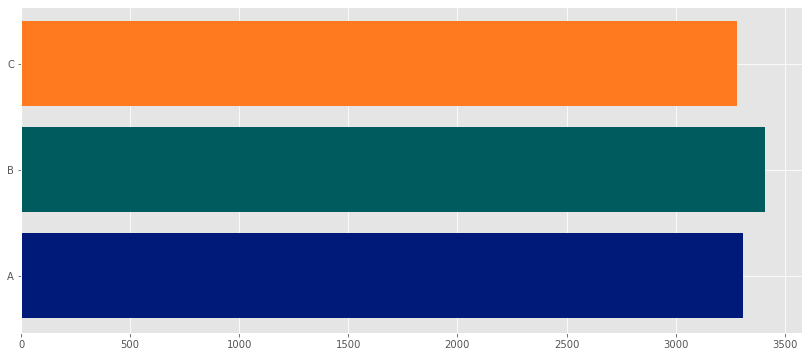

In [4]:
# Create a new figure.
fig, ax = plt.subplots(figsize=(14,6))

# Make the bar chart.
ax.barh(['A', 'B', 'C'], [A, B, C], color=['#001a79', '#005b5e', '#ff791e']);

<h2 style="color: rgb(0, 91, 94);">Simulate a Game</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Now that we can select a door at random, let us write code to simulate the game.

We break the game into the following steps:

1. Pick a door to put the car behind.
2. Have the contestant pick a door.
3. Have the host open one of the other doors to reveal a goat.
4. Ask the contestant if they want to switch.
5. Figure out whether or not the contestant wins.

In [5]:
def simulate(switch=False):
    """A function to simulate a game and tell us if the contestant wins.
       The contestant's strategy is to stay with their original choice
       if the parameter switch is False, and otherwise they switch."""
    
    # The three doors.
    doors = ['A', 'B', 'C']
    
    # 1. Pick a door to put the car behind.
    car = random.choice(doors)
    
    # 2. Have the contestant pick a door.
    pick = random.choice(doors)
    
    # 3. Have the show host open one of the other doors to reveal a goat.
    canopen = [door for door in doors if door != car and door != pick]
    show = random.choice(canopen)

    # 4. Ask the contestant if they want to switch (specified by parameter).
    if switch:
        # This is a bit hacky but gets the job done.
        pick = [door for door in doors if door != pick and door != show][0]
    
    # 5. Figure out whether or not the contestant wins.
    if pick == car:
        return True
    else:
        return False

We can now simulate a game in which the contestant stays with their original pick by running the following.

A return value of True means they won the car, False means they didn't.

In [6]:
simulate(switch=False)

False

We can simulate a game in which the contestant switches with the following code.

Again, a return value of True means they won the car, False means they didn't.

In [7]:
simulate(switch=True)

True

<h2 style="color: rgb(0, 91, 94);">Simulate Multiple Games</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The question we are looking to answer is whether staying with your original pick makes a difference.

Let's run the game 10,000 times where the contestant stays.

We'll see how often they win.

In [8]:
# This calls the simulate function 10000 times with switch set to False.
staying = [simulate(switch=False) for i in range(10000)]

# This is the number of times they win.
# We count the number of True's in the list staying.
staying_win = staying.count(True)

# This is the number of times they lose.
# We count the number of False's in the list staying.
staying_lose = staying.count(False)

Let us plot the results.

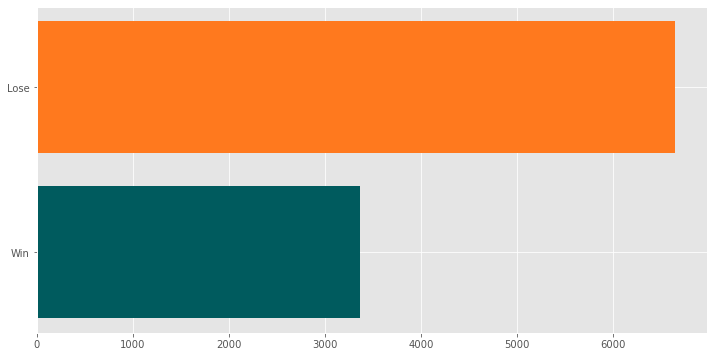

In [9]:
# Create a figure.
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar chart.
ax.barh(['Win', 'Lose'], [staying_win, staying_lose], color=['#005b5e', '#ff791e']);

It looks like when the contestant stays, they win only about a third of the time.

Now let us run the game 10,000 times where the contestant switches.

In [10]:
# This calls the simulate function 10,000 times with switch set to True.
switching = [simulate(switch=True) for i in range(10000)]

# This is the number of times they win.
# We count the number of True's in the list switching.
switching_win = switching.count(True)

# This is the number of times they lose.
# We count the number of False's in the list switching.
switching_lose = switching.count(False)

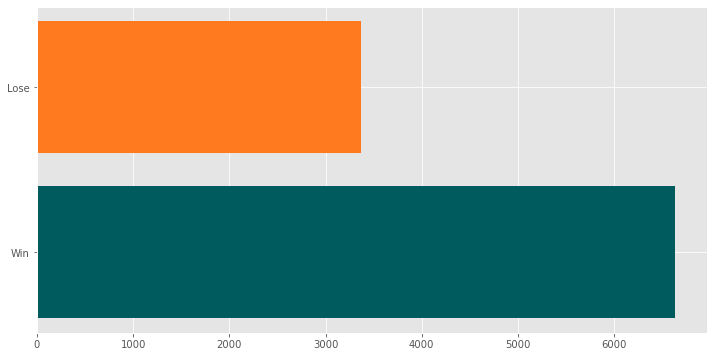

In [11]:
# Create a figure.
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar chart.
ax.barh(['Win', 'Lose'], [switching_win, switching_lose], color=['#005b5e', '#ff791e']);

<br>

Looks like you win two thirds of the time if you switch.

<h2 style="color: rgb(0, 91, 94);">The Conclusion</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

It looks like Marilyn vos Savant was right - you should always switch.

If you agree the simulation is a true reflection of the game, then we have strong evidence of this.

That is the main point of this notebook, that simulating real world problems in code is useful.

<br>

That said, I am sure you want some intuition as to why the result might be correct.

How can we make sense of the better chance of winning if you switch?

It seems as though it is a fifty-fifty choice between the two unopened doors.

You knew there was a goat behind at least one of the doors you did not pick.

So, the host showing you a goat did not surprise you.

<br>

Well, think of it this way and again the code here is useful.

In the game, and in the simulation, each door has a one third chance of having the car behind it.

That is locked in at the start and does not change - indeed that is one of our assumptions.

If the contestant picks one of the three doors at random, they will be right one third of the time.

They will be wrong two thirds of the time.

No matter what happens, if you stay with your original door you will win with one third probability.

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>